In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
coin1 = pd.read_csv("coin 1.csv") 
coin2 = pd.read_csv("coin 2.csv")

In [4]:
coin = pd.concat([coin1, coin2] , ignore_index=True)

In [5]:
missing_data = coin.isnull().sum()

In [6]:
missing_data

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [7]:
missing_data.dtypes

dtype('int64')

In [8]:
missing_data.info()

<class 'pandas.core.series.Series'>
Index: 9 entries, coin to date
Series name: None
Non-Null Count  Dtype
--------------  -----
9 non-null      int64
dtypes: int64(1)
memory usage: 444.0+ bytes


In [9]:
coin[['1h', '24h', '7d', '24h_volume']] = coin[['1h', '24h', '7d', '24h_volume']].fillna(coin[['1h', '24h', '7d', '24h_volume']].mean())

In [10]:
coin.isnull().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

In [11]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

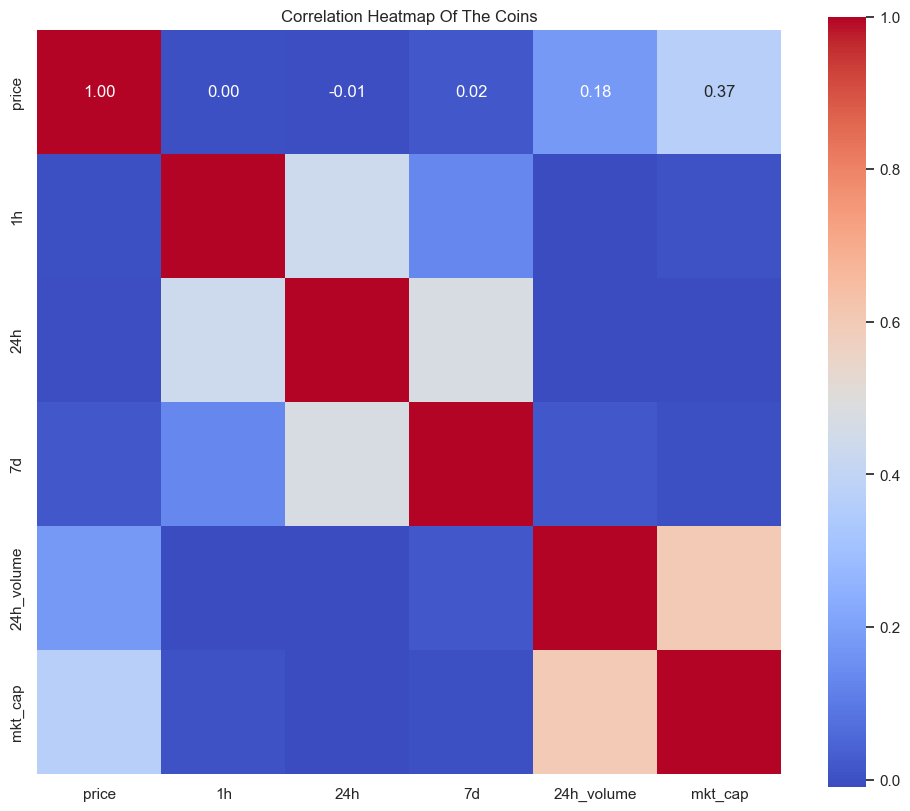

In [12]:
plt.figure(figsize=(12, 10))
corr = coin.select_dtypes(include=['float64', 'int']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap Of The Coins")
plt.savefig("Correlation Heatmap image.jpg")
plt.show()

In [13]:
plt.figure()
sns.histplot(coin['price'], bins=50, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.savefig("price_distribution.png")
plt.show()

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


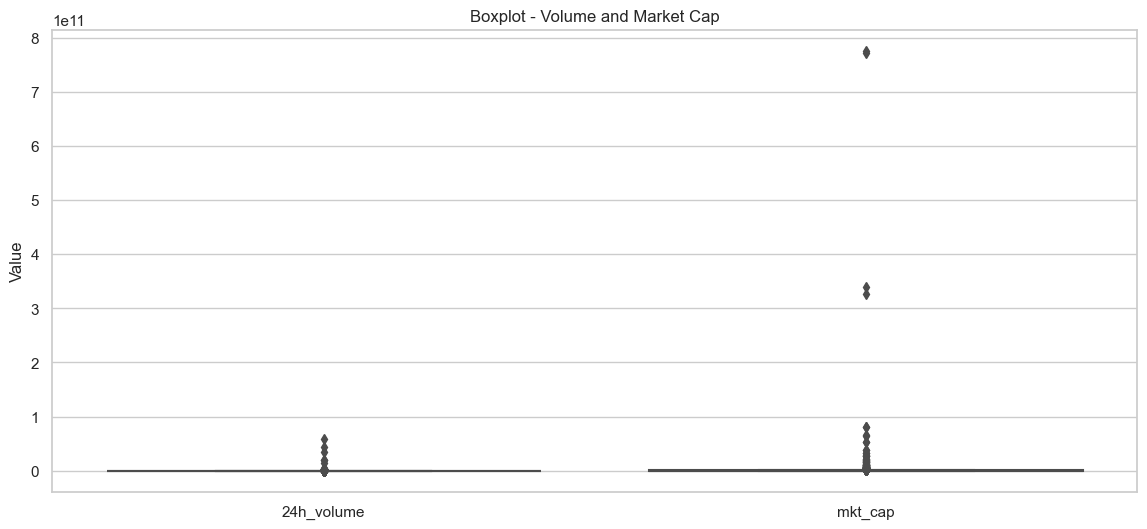

In [14]:
plt.figure()
sns.boxplot(data=coin[['24h_volume', 'mkt_cap']])
plt.title("Boxplot - Volume and Market Cap")
plt.ylabel("Value")
plt.savefig("volume_mktcap_boxplot.png")
plt.show()

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

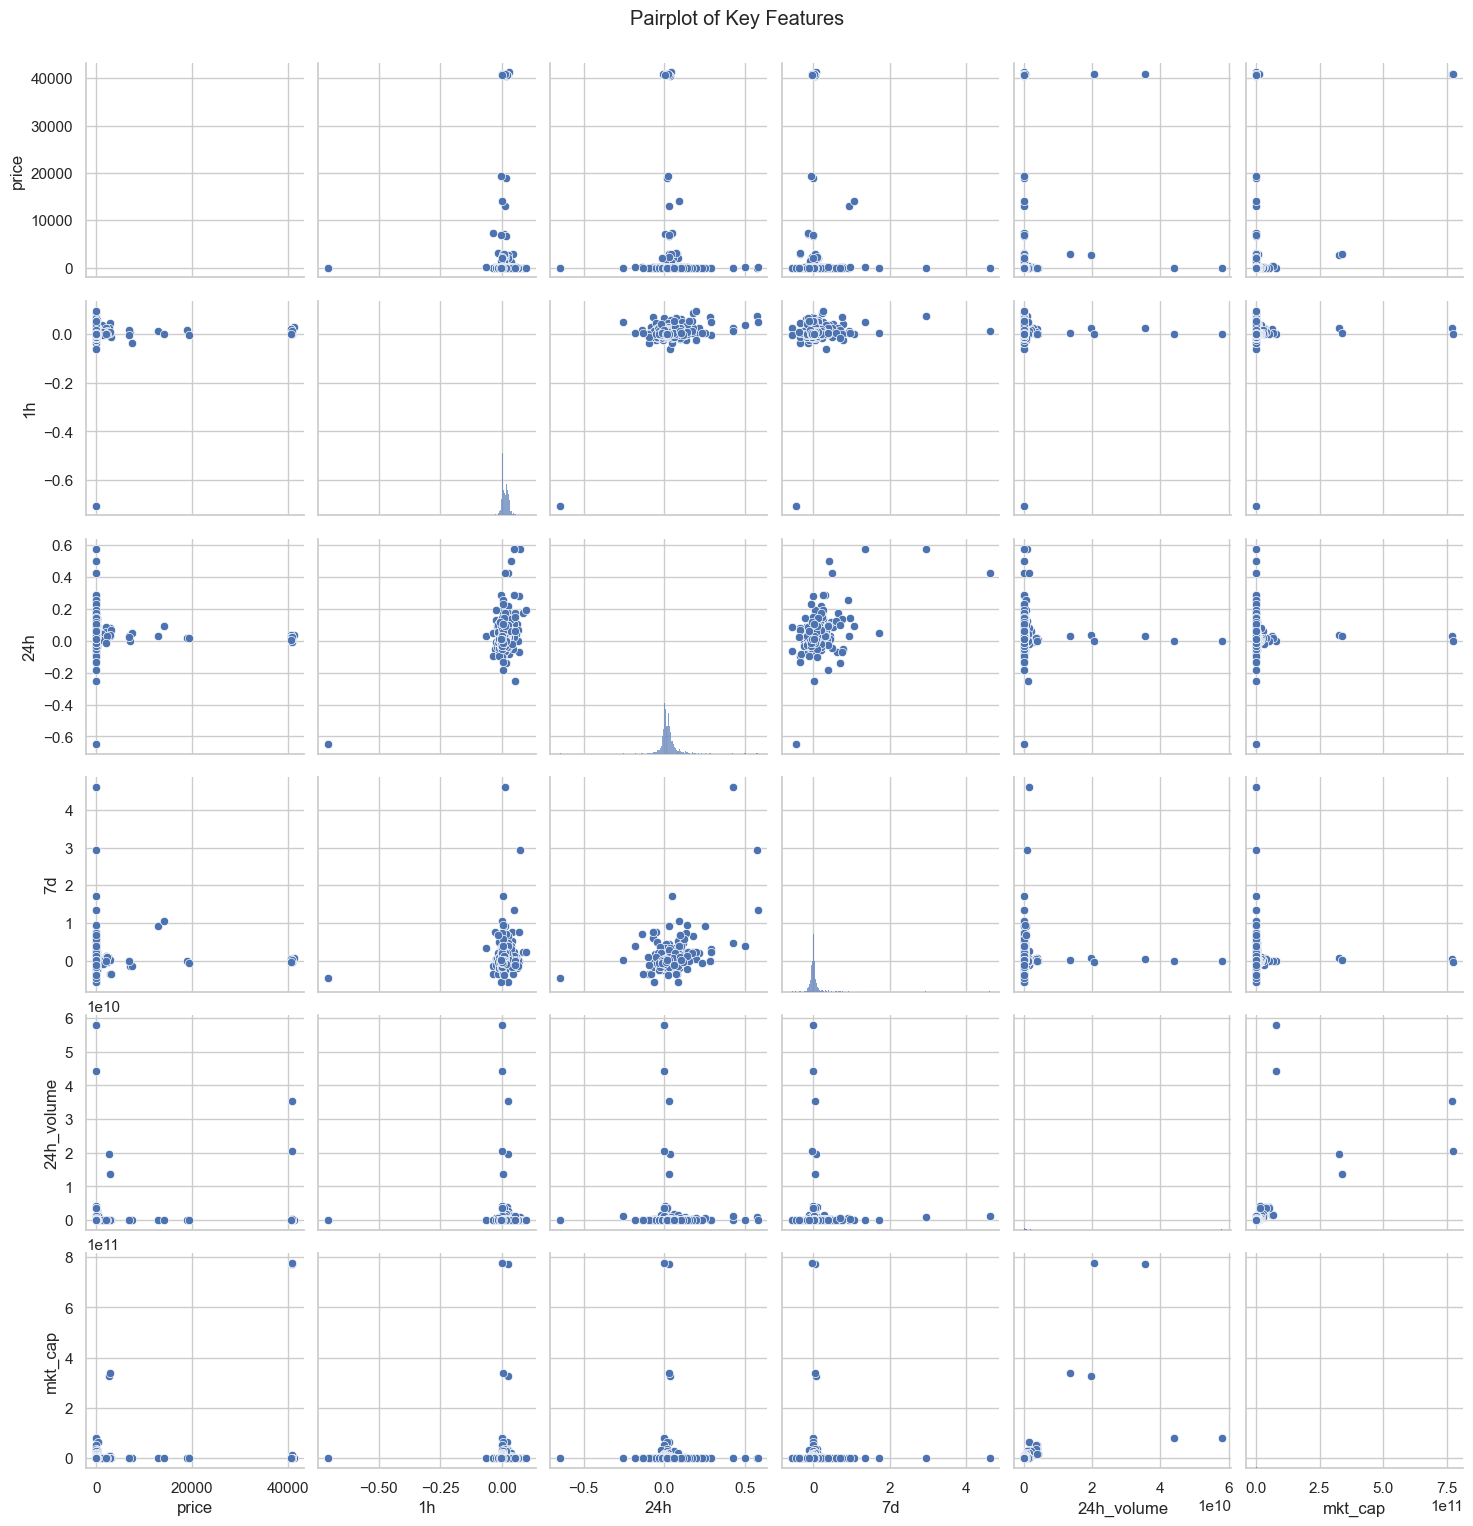

In [15]:
pairplot = sns.pairplot(coin[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']])
pairplot.fig.suptitle("Pairplot of Key Features", y=1.02)
pairplot.savefig("pairplot_features.png")
plt.show()

In [16]:
coin['date'] = pd.to_datetime(coin['date'])
top_coin = coin[coin['symbol'] == 'BTC']
plt.figure()
sns.lineplot(data=top_coin, x='date', y='price', marker='o')
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("btc_price_over_time.png")
plt.show()

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [17]:
# we have to remove outliers  from (24h_volume , mkt_cap , price)

In [18]:
# Lower Bound=Q1−1.5×IQR,Upper Bound=Q3+1.5×IQR

In [19]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

In [20]:
# Columns to clean
cols_to_clean = ['price', '24h_volume', 'mkt_cap']
coin_clean = remove_outliers_iqr(coin, cols_to_clean)

In [21]:
# Cleaned One - 

In [22]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

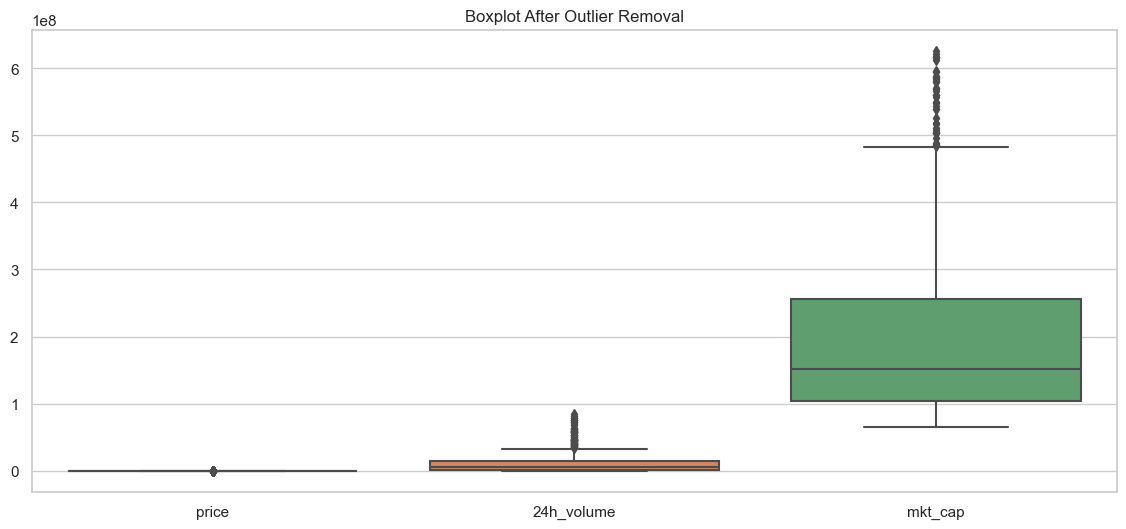

In [23]:

plt.figure()
sns.boxplot(data=coin_clean[cols_to_clean])
plt.title("Boxplot After Outlier Removal")
plt.savefig("cleaned_boxplot.png")
plt.show()

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


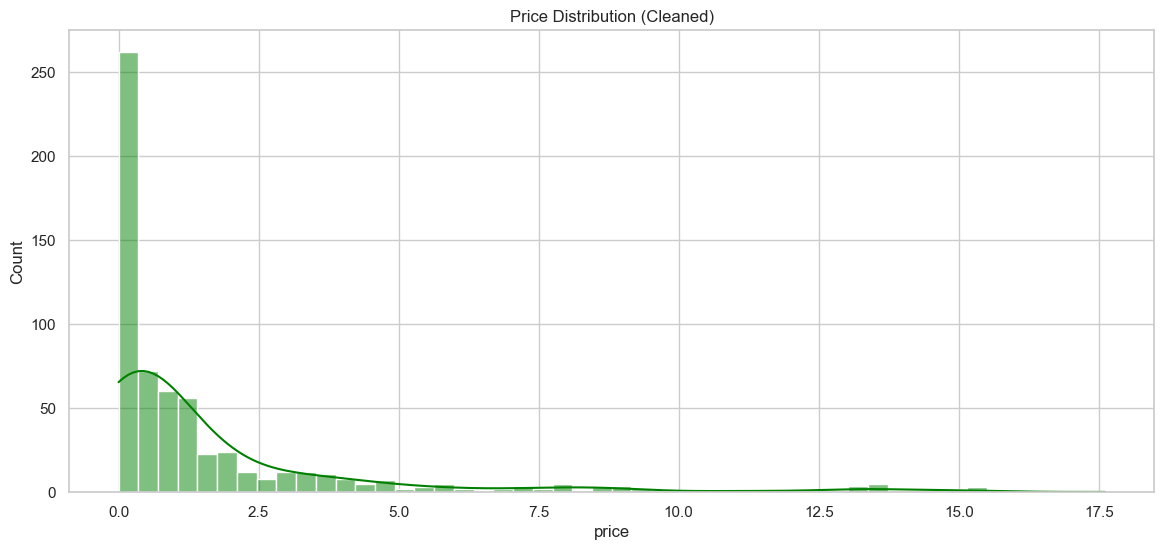

In [24]:
plt.figure()
sns.histplot(coin_clean['price'], bins=50, kde=True, color='green')
plt.title("Price Distribution (Cleaned)")
plt.savefig("cleaned_price_distribution.png")
plt.show()

In [25]:
import pandas as pd

# Group by latest date to get most recent data per coin
latest_date = coin['date'].max()
latest_data = coin[coin['date'] == latest_date]

# Sorting by 7d performance
top_5 = latest_data.sort_values(by='7d', ascending=False).head(5)
bottom_5 = latest_data.sort_values(by='7d', ascending=True).head(5)

print("Top 5 Performing Coins (7-day % change):")
print(top_5[['symbol', 'coin', '7d', 'price', '24h_volume', 'mkt_cap']])

print("\nBottom 5 Performing Coins (7-day % change):")
print(bottom_5[['symbol', 'coin', '7d', 'price', '24h_volume', 'mkt_cap']])


Top 5 Performing Coins (7-day % change):
     symbol                      coin     7d         price    24h_volume  \
655     GMT                     STEPN  4.608      0.761181  1.358531e+09   
577    XIDO              Xido Finance  1.357     48.680000  1.489749e+06   
857  MSHARE            Meerkat Shares  1.065  14141.320000  8.589756e+06   
882  ALPINE  Alpine F1 Team Fan Token  0.953     10.000000  2.266640e+08   
761     UBT                 Unibright  0.740      1.340000  1.513662e+06   

          mkt_cap  
655  4.562513e+08  
577  1.388958e+09  
857  1.261050e+08  
882  1.140390e+08  
761  2.017387e+08  

Bottom 5 Performing Coins (7-day % change):
     symbol              coin     7d        price   24h_volume       mkt_cap
582   HEART         Humans.ai -0.558     0.041456    898844.00  1.309128e+09
934    BZRX      bZx Protocol -0.464     0.062809        43.49  8.897184e+07
981   VADER    Vader Protocol -0.363     0.014688   3416278.00  7.129665e+07
957     PTP  Platypus Finance

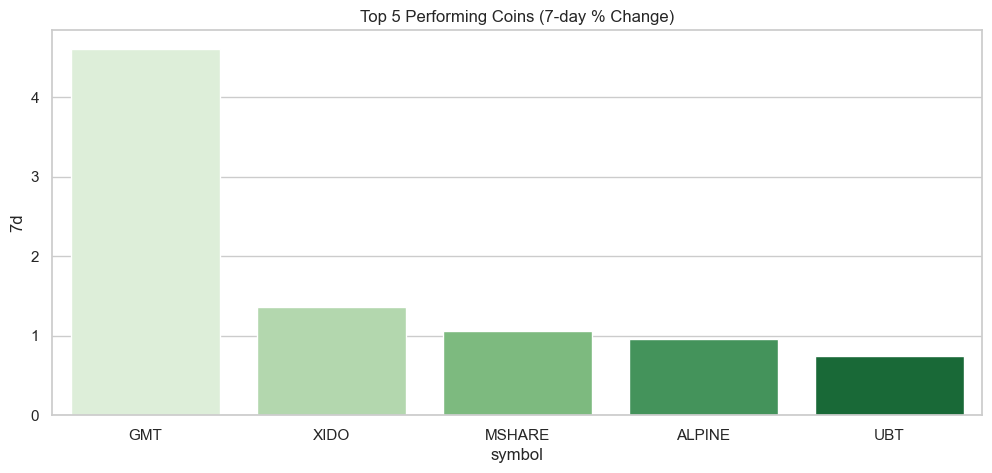

In [26]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_5, x='symbol', y='7d', palette='Greens')
plt.title("Top 5 Performing Coins (7-day % Change)")
plt.savefig("top_5_performers.png")
plt.show()

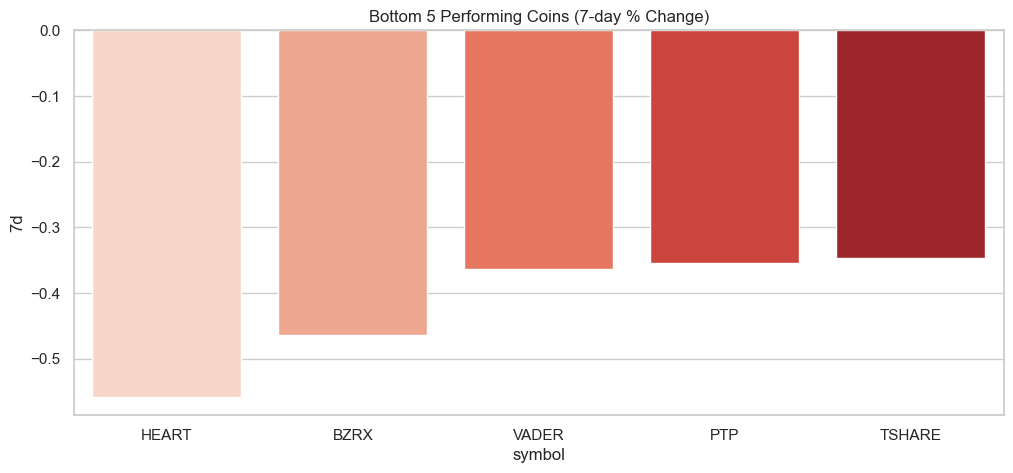

In [27]:
plt.figure(figsize=(12, 5))
sns.barplot(data=bottom_5, x='symbol', y='7d', palette='Reds')
plt.title("Bottom 5 Performing Coins (7-day % Change)")
plt.savefig("bottom_5_performers.png")
plt.show()

In [28]:
coin

coin symbol         price     1h    24h     7d  \
0              Bitcoin    BTC  40859.460000  0.022  0.030  0.055   
1             Ethereum    ETH   2744.410000  0.024  0.034  0.065   
2               Tether   USDT      1.000000 -0.001 -0.001  0.000   
3                  BNB    BNB    383.430000  0.018  0.028  0.004   
4             USD Coin   USDC      0.999874 -0.001  0.000 -0.000   
..                 ...    ...           ...    ...    ...    ...   
995            IRISnet   IRIS      0.055426  0.016 -0.003 -0.088   
996  Circuits of Value  COVAL      0.037961  0.002 -0.012 -0.054   
997         ARPA Chain   ARPA      0.069003 -0.000  0.008 -0.037   
998          SuperRare   RARE      0.464613 -0.003  0.014  0.019   
999         Verus Coin   VRSC      0.999387  0.053  0.061 -0.122   

       24h_volume       mkt_cap       date  
0    3.539076e+10  7.709915e+11 2022-03-16  
1    1.974870e+10  3.271044e+11 2022-03-16  
2    5.793497e+10  7.996516e+10 2022-03-16  
3    1.395854e+09  6.404382e+10 2022-03-16  
4    3.872274e+09  5.222214e+10 2022-03-16  
..            ...           ...        ...  
995  2.976839e+06  6.809024e+07 2022-03-17  
996  3.667870e+05  6.782627e+07 2022-03-17  
997  1.363376e+07  6.776284e+07 2022-03-17  
998  9.398219e+06  6.738822e+07 2022-03-17  
999  2.027507e+04  6.731896e+07 2022-03-17  

[1000 rows x 9 columns]

In [29]:
coin['price'] = pd.to_numeric(coin['price'], errors='coerce')
coin['24h_volume'] = pd.to_numeric(coin['24h_volume'], errors='coerce')

coin['returns_7d'] = coin.groupby('symbol')['price'].pct_change(periods=7)
coin['price_std7'] = coin.groupby('symbol')['price'].transform(lambda x: x.rolling(window=7, min_periods=1).std())
coin['volume_ma7'] = coin.groupby('symbol')['24h_volume'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
coin['liquidity_ratio'] = coin['24h_volume'] / (coin['price_std7'] + 1e-6)
coin['volatility_score'] = coin['price_std7'] * coin.groupby('symbol')['24h_volume'].transform(lambda x: x.rolling(window=7, min_periods=1).std())


In [30]:
coin

coin symbol         price     1h    24h     7d  \
0              Bitcoin    BTC  40859.460000  0.022  0.030  0.055   
1             Ethereum    ETH   2744.410000  0.024  0.034  0.065   
2               Tether   USDT      1.000000 -0.001 -0.001  0.000   
3                  BNB    BNB    383.430000  0.018  0.028  0.004   
4             USD Coin   USDC      0.999874 -0.001  0.000 -0.000   
..                 ...    ...           ...    ...    ...    ...   
995            IRISnet   IRIS      0.055426  0.016 -0.003 -0.088   
996  Circuits of Value  COVAL      0.037961  0.002 -0.012 -0.054   
997         ARPA Chain   ARPA      0.069003 -0.000  0.008 -0.037   
998          SuperRare   RARE      0.464613 -0.003  0.014  0.019   
999         Verus Coin   VRSC      0.999387  0.053  0.061 -0.122   

       24h_volume       mkt_cap       date  returns_7d  price_std7  \
0    3.539076e+10  7.709915e+11 2022-03-16         NaN         NaN   
1    1.974870e+10  3.271044e+11 2022-03-16         NaN         NaN   
2    5.793497e+10  7.996516e+10 2022-03-16         NaN         NaN   
3    1.395854e+09  6.404382e+10 2022-03-16         NaN         NaN   
4    3.872274e+09  5.222214e+10 2022-03-16         NaN         NaN   
..            ...           ...        ...         ...         ...   
995  2.976839e+06  6.809024e+07 2022-03-17         NaN    0.000211   
996  3.667870e+05  6.782627e+07 2022-03-17         NaN    0.000213   
997  1.363376e+07  6.776284e+07 2022-03-17         NaN    0.000345   
998  9.398219e+06  6.738822e+07 2022-03-17         NaN    0.004586   
999  2.027507e+04  6.731896e+07 2022-03-17         NaN         NaN   

       volume_ma7  liquidity_ratio  volatility_score  
0    3.539076e+10              NaN               NaN  
1    1.974870e+10              NaN               NaN  
2    5.793497e+10              NaN               NaN  
3    1.395854e+09              NaN               NaN  
4    3.872274e+09              NaN               NaN  
..            ...              ...               ...  
995  4.627218e+06     1.402908e+10        492.916484  
996  4.839890e+05     1.711022e+09         35.365322  
997  1.423604e+07     3.942184e+10        293.718735  
998  1.290980e+07     2.048750e+09      22776.127338  
999  2.027507e+04              NaN               NaN  

[1000 rows x 14 columns]

In [ ]:
coin.isnull().sum()

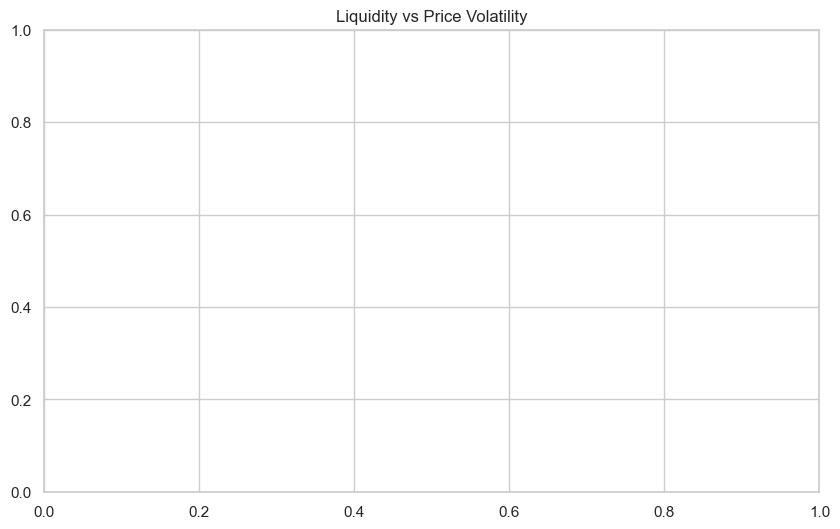

In [33]:
sns.set(style="whitegrid")
latest = coin[coin['date'] == coin['date'].max()]

# 1. Liquidity Ratio vs Volatility
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest, x='price_std7', y='liquidity_ratio', hue='symbol')
plt.title("Liquidity vs Price Volatility")
plt.savefig("liquidity_vs_volatility.png")
plt.show()